In [1]:
import geodatasets
import geopandas as gpd
import pandas as pd

import mapclassify
from mapclassify.util import get_color_array

%load_ext watermark
%watermark -a 'eli knaap' -iv

Author: eli knaap

geodatasets: 2024.8.0
mapclassify: 2.7.1.dev1+g573caba.d20240714
geopandas  : 1.0.1
pandas     : 2.2.3



In [2]:
df = gpd.read_file(geodatasets.get_path("geoda cincinnati")).to_crs(4326)

<Axes: >

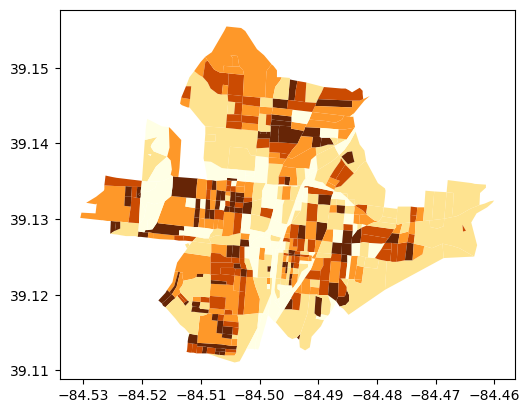

In [3]:
# use mapclassify under the hood
df.plot("DENSITY", scheme="quantiles", cmap="YlOrBr")

In [4]:
# get colors directly and pass them to geopandas
colors = get_color_array(
    df.DENSITY.values, scheme="quantiles", cmap="YlOrBr", as_hex=True
)

In [5]:
colors

array(['#fee290', '#fd9828', '#fee290', '#662505', '#fee290', '#fd9828',
       '#662505', '#fd9828', '#fd9828', '#ca4b02', '#fd9828', '#662505',
       '#662505', '#fd9828', '#ffffe5', '#662505', '#662505', '#ca4b02',
       '#662505', '#662505', '#fee290', '#662505', '#ca4b02', '#662505',
       '#ffffe5', '#fd9828', '#fee290', '#ca4b02', '#fd9828', '#fd9828',
       '#ffffe5', '#ca4b02', '#fd9828', '#ca4b02', '#ffffe5', '#662505',
       '#662505', '#ca4b02', '#fd9828', '#ca4b02', '#fee290', '#ca4b02',
       '#662505', '#ffffe5', '#fd9828', '#fd9828', '#fd9828', '#fee290',
       '#fee290', '#fee290', '#662505', '#ffffe5', '#ffffe5', '#fee290',
       '#ffffe5', '#ca4b02', '#fd9828', '#fd9828', '#ffffe5', '#ca4b02',
       '#fd9828', '#fee290', '#ca4b02', '#ca4b02', '#ca4b02', '#ca4b02',
       '#662505', '#fd9828', '#fee290', '#fee290', '#fee290', '#fee290',
       '#fee290', '#ffffe5', '#fd9828', '#ffffe5', '#ffffe5', '#fee290',
       '#fd9828', '#ffffe5', '#ffffe5', '#ffffe5', 

<Axes: >

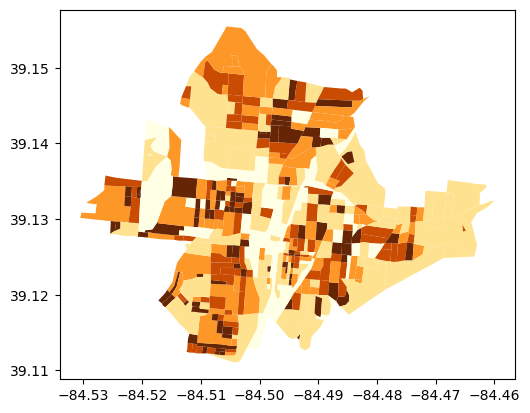

In [6]:
df.plot(color=colors)

geopandas `explore` method can also use mapclassify under the hood or take a list of colors

In [7]:
# json doesnt like numpy arrays
df.explore(color=list(colors), tiles="CartoDB Positron")

For some visualization libraries, you *need* to pass the colors explicitly. Their examples usually punt on classification schemes, but rather use linear or logarithmic scalers 

In [8]:
from lonboard import Map, PolygonLayer

lonboard requires a 2-dimensional array of integers

In [9]:
colors = get_color_array(
    df.DENSITY.values, scheme="quantiles", cmap="YlOrBr", alpha=0.6
)

In [10]:
colors

array([[254, 226, 144, 153],
       [253, 152,  40, 153],
       [254, 226, 144, 153],
       ...,
       [255, 255, 229, 153],
       [202,  75,   2, 153],
       [254, 226, 144, 153]], dtype=uint8)

In [11]:
# get RGBA instead of hex
layer = PolygonLayer.from_geopandas(
    df,
    get_fill_color=colors,
)
m = Map(layers=[layer], _height=800)
m

Map(custom_attribution='', layers=(PolygonLayer(get_fill_color=arro3.core.ChunkedArray<FixedSizeList(Field { n…

In [12]:
import pydeck as pdk

pydeck requires a list of RGBA colors, but because JSON cant serialize uint8, it needs lists of floats

In [13]:
df["fill"] = pd.Series(list(colors.astype(float))).apply(list).values

In [14]:
df["fill"]

0      [254.0, 226.0, 144.0, 153.0]
1       [253.0, 152.0, 40.0, 153.0]
2      [254.0, 226.0, 144.0, 153.0]
3         [102.0, 37.0, 5.0, 153.0]
4      [254.0, 226.0, 144.0, 153.0]
                   ...             
452     [253.0, 152.0, 40.0, 153.0]
453     [253.0, 152.0, 40.0, 153.0]
454    [255.0, 255.0, 229.0, 153.0]
455       [202.0, 75.0, 2.0, 153.0]
456    [254.0, 226.0, 144.0, 153.0]
Name: fill, Length: 457, dtype: object

In [15]:
layers = [
    pdk.Layer(
        "GeoJsonLayer",
        data=df.to_crs(4326)[["geometry", "fill"]],
        get_fill_color="fill",
        auto_highlight=True,
        pickable=True,
    ),
]
view_state = pdk.ViewState(
    **{
        "latitude": df.unary_union.centroid.y,
        "longitude": df.unary_union.centroid.x,
        "zoom": 12,
    }
)
D = pdk.Deck(
    layers,
    map_provider="carto",
    map_style=pdk.map_styles.LIGHT,
    initial_view_state=view_state,
)
D

/var/folders/83/5wjwwxnd4xl_z6g0w9z62dfh0000gn/T/ipykernel_82857/2621593671.py:12: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  "latitude": df.unary_union.centroid.y,
/var/folders/83/5wjwwxnd4xl_z6g0w9z62dfh0000gn/T/ipykernel_82857/2621593671.py:13: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  "longitude": df.unary_union.centroid.x,


{
  "initialViewState": {
    "latitude": 39.131503402108,
    "longitude": -84.49709440453084,
    "zoom": 12
  },
  "layers": [
    {
      "@@type": "GeoJsonLayer",
      "autoHighlight": true,
      "data": [
        {
          "fill": [
            254.0,
            226.0,
            144.0,
            153.0
          ],
          "geometry": {
            "coordinates": [
              [
                [
                  -84.47834300046591,
                  39.12445999987407
                ],
                [
                  -84.47774300046596,
                  39.12445999987407
                ],
                [
                  -84.47744300046601,
                  39.1243599998741
                ],
                [
                  -84.4766430004661,
                  39.1243599998741
                ],
                [
                  -84.47524300046624,
                  39.12455999987408
                ],
                [
                  -84.47394300046638,
                  39.12455999987409
                ],
                [
                  -84.47224300046658,
                  39.12535999987403
                ],
                [
                  -84.47194300046661,
                  39.12645999987392
                ],
                [
                  -84.47064200046675,
                  39.12615999987395
                ],
                [
                  -84.4703420004668,
                  39.12625999987395
                ],
                [
                  -84.46884200046696,
                  39.12675999987392
                ],
                [
                  -84.46864200046697,
                  39.1248599998741
                ],
                [
                  -84.47188800046659,
                  39.1234969998742
                ],
                [
                  -84.47603700046615,
                  39.12175399987434
                ],
                [
                  -84.47864300046585,
                  39.120659999874455
                ],
                [
                  -84.47854300046589,
                  39.12185999987432
                ],
                [
                  -84.47834300046591,
                  39.12445999987407
                ]
              ]
            ],
            "type": "Polygon"
          }
        },
        {
          "fill": [
            253.0,
            152.0,
            40.0,
            153.0
          ],
          "geometry": {
            "coordinates": [
              [
                [
                  -84.5082430004627,
                  39.126759999873755
                ],
                [
                  -84.50554300046298,
                  39.12655999987377
                ],
                [
                  -84.50564300046297,
                  39.12495999987392
                ],
                [
                  -84.50604300046291,
                  39.125059999873905
                ],
                [
                  -84.50674300046285,
                  39.125459999873875
                ],
                [
                  -84.50824300046268,
                  39.12555999987385
                ],
                [
                  -84.5082430004627,
                  39.126759999873755
                ]
              ]
            ],
            "type": "Polygon"
          }
        },
        {
          "fill": [
            254.0,
            226.0,
            144.0,
            153.0
          ],
          "geometry": {
            "coordinates": [
              [
                [
                  -84.50864300046265,
                  39.12745999987367
                ],
                [
                  -84.50844300046269,
                  39.12795999987365
                ],
                [
                  -84.50794300046275,
                  39.12845999987357
                ],
                [
                  -84.50784300046276,
           